<a href="https://colab.research.google.com/github/Thanujasubramani/Cognifyz-Technologies-Assisment/blob/main/cognifyz_level1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/Dataset  (1).csv',encoding='latin-1')

In [ ]:
#Remove Missing Values
clean_df = df.dropna(subset=['Cuisines'])


In [ ]:
# Split Cuisines Into Individual Items
# Split cuisines by comma and expand
all_cuisines = clean_df['Cuisines'].str.split(', ')

# Flatten the list
from itertools import chain
cuisine_list = list(chain.from_iterable(all_cuisines))


In [ ]:
# Count Each Cuisine
cuisine_counts = pd.Series(cuisine_list).value_counts()

print("Top 10 Cuisines:")
print(cuisine_counts.head(10))


Top 10 Cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: count, dtype: int64


In [ ]:
# Top Three Most Common Cuisines
top3 = cuisine_counts.head(3)

print("Top 3 Most Common Cuisines:")
print(top3)


Top 3 Most Common Cuisines:
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


In [ ]:
# Calculate Percentage of Restaurants Serving Each Top Cuisine
total_restaurants = len(clean_df)

top3_percentage = (top3 / total_restaurants) * 100

print("Percentage of Restaurants Serving Top 3 Cuisines:")
print(top3_percentage)


Percentage of Restaurants Serving Top 3 Cuisines:
North Indian    41.500734
Chinese         28.662754
Fast Food       20.813247
Name: count, dtype: float64


In [ ]:
summary = pd.DataFrame({
    'Number of Restaurants': top3,
    'Percentage (%)': top3_percentage
})

summary


,Number of Restaurants,Percentage (%)
North Indian,3960,41.500734
Chinese,2735,28.662754
Fast Food,1986,20.813247


**Task2: City Analysis**

* Identify the city with the highest number
of restaurants in the dataset.

* Calculate the average rating for
restaurants in each city.

* Determine the city with the highest
average rating.

In [ ]:
city_counts = df['City'].value_counts()

top_city = city_counts.idxmax()
top_city_count = city_counts.max()

print("City with highest number of restaurants:", top_city)
print("Number of restaurants:", top_city_count)


City with highest number of restaurants: New Delhi
Number of restaurants: 5473


In [ ]:
rated_df = df[df['Aggregate rating'] > 0]

city_avg_rating = rated_df.groupby('City')['Aggregate rating'].mean()

city_avg_rating = city_avg_rating.sort_values(ascending=False)

print(city_avg_rating)


City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
Consort             3.000000
Mayfield            2.900000
Paynesville         2.600000
Montville           2.400000
Mc Millan           2.400000
Name: Aggregate rating, Length: 141, dtype: float64


In [ ]:
highest_avg_city = city_avg_rating.idxmax()
highest_avg_value = city_avg_rating.max()

print("City with highest average rating:", highest_avg_city)
print("Average rating:", highest_avg_value)


City with highest average rating: Inner City
Average rating: 4.9


**Task3: Price Range Distribution**

* Create a histogram or bar chart to
visualize the distribution of price ranges
among the restaurants.

* Calculate the percentage of restaurants
in each price range category.

In [ ]:
df['Price range'].value_counts().sort_index()


,count
Price range,
1,4444
2,3113
3,1408
4,586


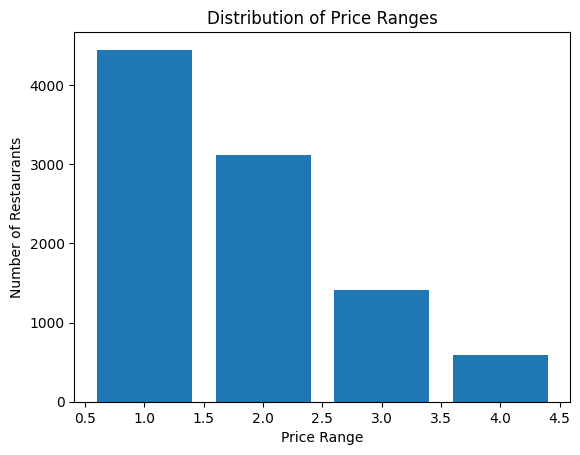

In [ ]:
price_counts = df['Price range'].value_counts().sort_index()

plt.figure()
plt.bar(price_counts.index, price_counts.values)
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Price Ranges")
plt.show()


In [ ]:
price_percentage = (
    df['Price range']
    .value_counts(normalize=True)
    .sort_index() * 100
)

price_percentage


,proportion
Price range,
1,46.529159
2,32.593446
3,14.741912
4,6.135483


In [ ]:
summary = pd.DataFrame({
    'Number of Restaurants': price_counts,
    'Percentage (%)': price_percentage.round(2)
})

summary


,Number of Restaurants,Percentage (%)
Price range,,
1,4444,46.53
2,3113,32.59
3,1408,14.74
4,586,6.14


**Task4: Online Delivery**

* Determine the percentage of restaurants
that offer online delivery.

* Compare the average ratings of restaurants
with and without online delivery.

In [ ]:
delivery_counts = df['Has Online delivery'].value_counts()

delivery_percentage = (
    df['Has Online delivery']
    .value_counts(normalize=True) * 100
)

summary = pd.DataFrame({
    'Number of Restaurants': delivery_counts,
    'Percentage (%)': delivery_percentage.round(2)
})

summary


,Number of Restaurants,Percentage (%)
Has Online delivery,,
No,7100,74.34
Yes,2451,25.66


In [ ]:
rated_df = df[df['Aggregate rating'] > 0]

avg_ratings = rated_df.groupby('Has Online delivery')['Aggregate rating'].mean()

avg_ratings


,Aggregate rating
Has Online delivery,
No,3.467433
Yes,3.381274


In [ ]:
comparison = pd.DataFrame({
    'Average Rating': avg_ratings.round(2)
})

comparison


,Average Rating
Has Online delivery,
No,3.47
Yes,3.38


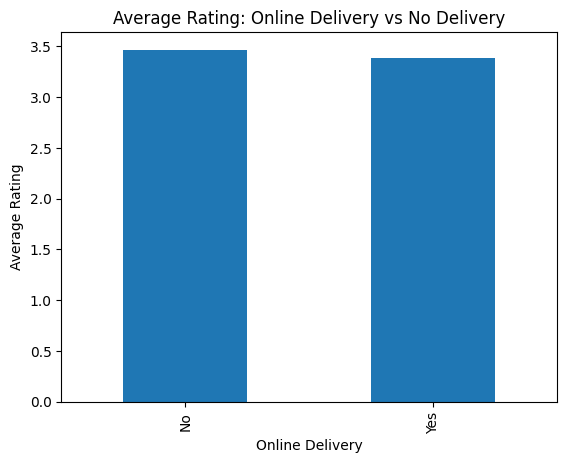

In [ ]:
avg_ratings.plot(kind='bar')

import matplotlib.pyplot as plt
plt.xlabel("Online Delivery")
plt.ylabel("Average Rating")
plt.title("Average Rating: Online Delivery vs No Delivery")
plt.show()
